# Análise dos Dados

Importação da biblioteca necessária

In [0]:
import pandas as pd

Importação dos dados nos repositórios do github

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

Análise dos dados de "filmes"

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Análise dos dados de "avaliacoes"

In [4]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Mudança para português das colunas de "filmes" e "avaliacoes"

In [5]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Calcular as notas médias de cada filme e explorar as primeiras 5 médias

In [7]:
#Manter a organização de acordo os ids de cada filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
#Visualizar as 5 primeiras médias
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Adicionar uma nova coluna com a média de cada filme para a tabela em uma nova variável 

In [8]:
#Adicionar a tabela a nova coluna com as médias
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
#
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafios

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


Confirmação de filmes sem avaliações

In [9]:
print("Número total de filmes:", len(filmes))
print("Número total de filmes com média:", len(notas_medias_por_filme))

Número total de filmes: 9742
Número total de filmes com média: 9724


Para determinar quais filmes não tiveram nota, é preciso saber quais filmes não tiveram média

In [10]:
#O @ é necessário para referir a variável
filmes_avaliados = filmes_com_media.query("nota in @notas_medias_por_filme")
filmes_nao_avaliados = filmes_com_media.query("nota not in @notas_medias_por_filme")
#Para determinar quantos filmes não foram avaliados basta verificar o tamanho desse DataFrame com os filmes não avaliados
print("Quantidade de filmes não avaliados:", len(filmes_nao_avaliados))

Quantidade de filmes não avaliados: 18


Conforme a ideia, 18 filmes realmente não foram avaliados

Como a quantidade é relativamente pequena, é possível visualizar todos os filmes que não tiveram média

In [11]:
filmes_nao_avaliados

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [12]:
#Manter as colunas e mudar apenas a última, que corresponde a coluna "nota"
filmes_com_media.columns = [coluna for coluna in filmes_com_media.columns[0:len(filmes.columns)]] + ["media"]
#visualizar apenas as primeiras colunas para verificar a mudança
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [13]:
numero_de_avaliacoes = avaliacoes.groupby("filmeId")["nota"].count()
#Mudar o nome da coluna
numero_de_avaliacoes.name = "Votos"
filmes_com_media = filmes_com_media.join(numero_de_avaliacoes, on="filmeId")
#Visualizar a mudança
filmes_com_media.head()

,filmeId,titulo,generos,media,Votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [14]:
#Conversão para string com 2 duas casas decimais e depois para float
filmes_com_media["media"] = [float("%.2f" %media) for media in filmes_com_media["media"]]
#Visualizar mudança
filmes_com_media.head()

,filmeId,titulo,generos,media,Votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [15]:
generos_dos_filmes = []
filmes_com_media["generos"][0]
for generos in filmes_com_media["generos"]:
  #Mais de um gênero para o mesmo filme é identificado por |, por isso separar por |
  lista_de_generos = generos.split("|")
  for genero in lista_de_generos:
    #Verificar se o gênero já não está na lista de generos
    if not genero in generos_dos_filmes:
      generos_dos_filmes.append(genero)

#Verificar a lista de gêneros únicos
print(generos_dos_filmes)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [16]:
#Criar uma lista que armazene o número de aparições
num_aparicoes_de_cada_genero = dict([[genero,0] for genero in generos_dos_filmes])
for generos in filmes_com_media["generos"]:
  lista_de_generos = generos.split("|")
  for genero in lista_de_generos:
    #Atualiza o gênero somando +1 em seu valor
    num_aparicoes_de_cada_genero[genero] += 1

#Visualizar o número de aparições de cada gênero
print("Número de aparições de cada genero")
num_aparicoes_de_cada_genero

Número de aparições de cada genero


{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

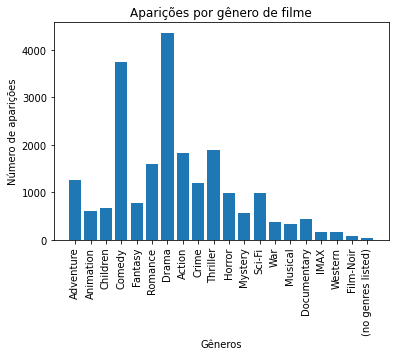

In [17]:
import matplotlib.pyplot as plt
#Eixo y e x respectivamente
plt.xlabel("Gêneros")
plt.ylabel("Número de aparições")
#Título
plt.title("Aparições por gênero de filme")
#Se simplesmente mostrar cada gênero, isso causa uma inviabilidade para ler, é melhor rotacionar os gêneros
plt.xticks(range(0, len(num_aparicoes_de_cada_genero.keys())),num_aparicoes_de_cada_genero.keys(), rotation=90)
#Pegar as informações de cada gênero e seu número de aparição
plt.bar(num_aparicoes_de_cada_genero.keys(), num_aparicoes_de_cada_genero.values())
plt.show()